# Cliques

We'll use the powerful networkx library to study graphs and networks.

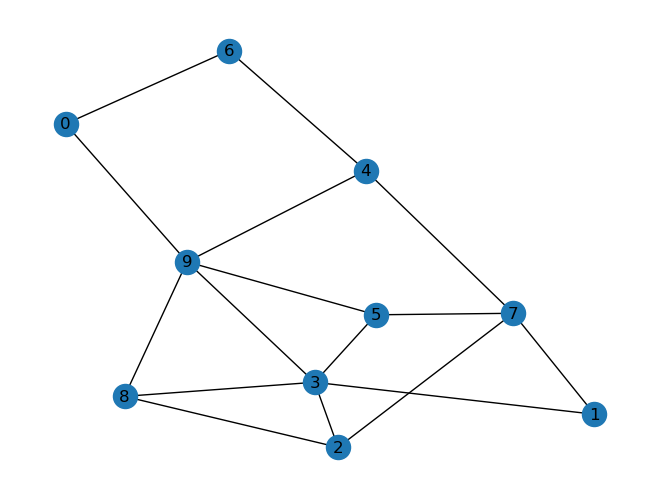

In [1]:
import networkx as nx
G = nx.gnp_random_graph(n=10, p=0.30)
nx.draw(G, with_labels=True)

Here's my own code to generate and draw specific types of networks.

In [2]:
import networkx as nx
import random

#
# when seed is None, the graph is randomly generated and colored.
#
def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25, seed=2022):
    random.seed(seed)
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G


def draw_colored_graph(G):
    nx.draw(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )



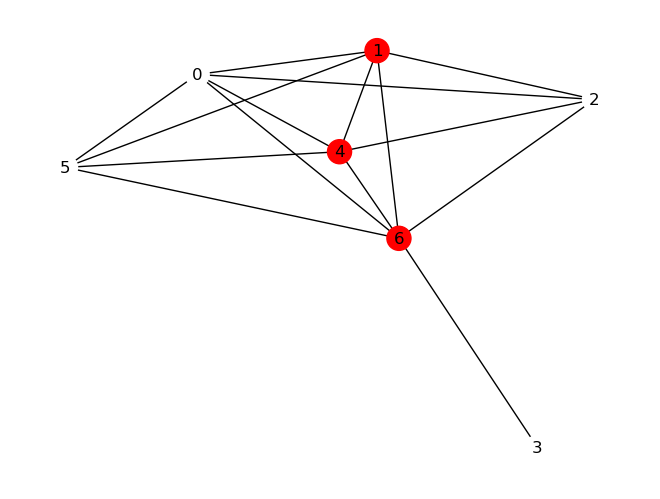

In [3]:
my_network = randomly_colored_graph(7, pair_prob=0.7, color_prob=0.3, seed=78)
draw_colored_graph(my_network)

Useful graph attributes/methods:
+ .nodes
+ .edges

In [4]:
my_network.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [6]:
# my_network.nodes[8]

In [ ]:
my_network.edges

In [ ]:
my_network.edges[5,6]

In [ ]:
(5,6) in my_network.edges

In [ ]:
(6,5) in my_network.edges

In [ ]:
(4,5) in my_network.edges

Applications of backtracking:
* Find groups of mutual friends with 3 persons.
* Find triangles with two red nodes


### Find all triangles in a network

A triangle is a group of 3 people who mutually know each other in a network.

First, we need to know what "solution" is.

solution can be a list/set of 3 things.  This can work, but we might need to modify the structure of the backtracking algorithm.

In our template, solution is a list of n things (e.g. n nodes in a network).

In this network application, what do you think solution[i] is?

solution[i] is True if node i is in the solution/set.

The triangle {5, 0, 6} is this solution: [True, False, False, False, False, True, True, False]


In [ ]:
def all_triangles(solution, i, g):
    def is_triangle(nodes):
        if len(nodes)!=3:
            return False
        a, b, c = nodes[0], nodes[1], nodes[2]
        return (a,b) in g.edges and (a,c) in g.edges and (b,c) in g.edges
        
    if i==len(solution):
        nodes = [i for i in range(len(solution)) if solution[i]==True]
        if is_triangle(nodes):
            print(nodes)
    else:
        possibilities = get_possibilities(solution, i, g)
        for p in possibilities:              # for each possibility
            solution[i] = p                  #     configure solution[i] with that possibility
            all_triangles(solution, i+1, g)  #     use the same procedure to generate all solutions 
                                             #        starting from level i+1

# this guarantees I don't go beyond 4 nodes.
def get_possibilities(solution, i, g):
    def get_nodes():
        return [solution[j] for j in range(i) if solution[j]==True]
    previously_chosen_nodes = get_nodes()
    if len(previously_chosen_nodes) > 3:
        return []    
    return [True, False]

This is slower, but easier to understand.

solution is a set of nodes.

solution is a list of boolean values.  solution[j] is True if node j is in the set.

In [7]:
def all_triangles(solution, i, g):
    def is_triangle(nodes):
        if len(nodes)!=3:
            return False
        a, b, c = nodes[0], nodes[1], nodes[2]
        return (a,b) in g.edges and (a,c) in g.edges and (b,c) in g.edges
        
    if i==len(solution):
        nodes = [i for i in range(len(solution)) if solution[i]==True]
        if is_triangle(nodes):
            print(nodes)
    else:
        for p in [True, False]:              # for each possibility
            solution[i] = p                  #     configure solution[i] with that possibility
            all_triangles(solution, i+1, g)  #     use the same procedure to generate all solutions 
                                             #        starting from level i+1


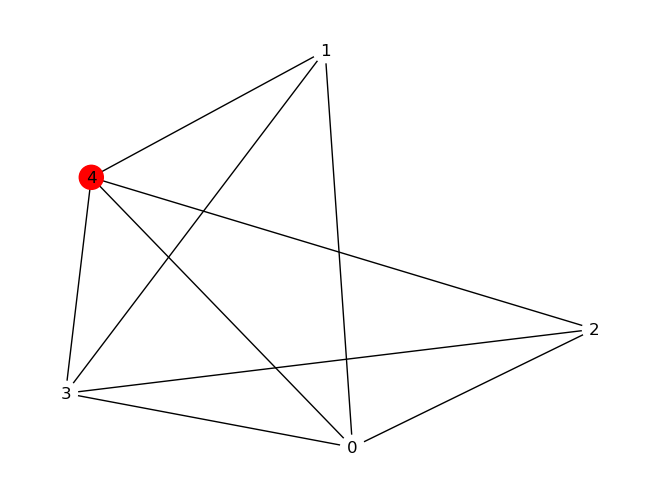

In [12]:
my_network = randomly_colored_graph(5, pair_prob=0.7, color_prob=0.3, seed=None)
draw_colored_graph(my_network)

In [13]:
all_triangles([None]*len(my_network), 0, my_network)

[0, 1, 3]
[0, 1, 4]
[0, 2, 3]
[0, 2, 4]
[0, 3, 4]
[1, 3, 4]
[2, 3, 4]


**Problem:  find all triangles with 2 red nodes.**

We use backtracking to go through all possible sets of nodes.  When we have a complete solution/set, we check to see if the solution/set of nodes is a triangle with 2 red nodes.

In [ ]:
def all_triangles_with_2reds(solution, i, g):
    def is_triangle_with_2reds(nodes):
        if len(nodes)!=3:
            return False
        a, b, c = nodes[0], nodes[1], nodes[2]
        reds = 0
        if g.nodes[a]['color']=='red':
            reds += 1
        if g.nodes[b]['color']=='red':
            reds += 1
        if g.nodes[c]['color']=='red':
            reds += 1
        return (a,b) in g.edges and (a,c) in g.edges and (b,c) in g.edges and reds==2
        
    if i==len(solution):
        nodes = [i for i in range(len(solution)) if solution[i]==True]
        if is_triangle_with_2reds(nodes):
            print(nodes)
    else:
        for p in [True, False]:             
            solution[i] = p                
            all_triangles_with_2reds(solution, i+1, g)


In [ ]:
my_network = randomly_colored_graph(5, pair_prob=0.7, color_prob=0.6, seed=56)
draw_colored_graph(my_network)

In [ ]:
all_triangles_with_2reds([None]*len(my_network), 0, my_network)

**Problem: find a group of 3 nodes, say, A, B and C, where A and B are connected, A and C are connected, but B and C are not connected. Further B and C are red.**

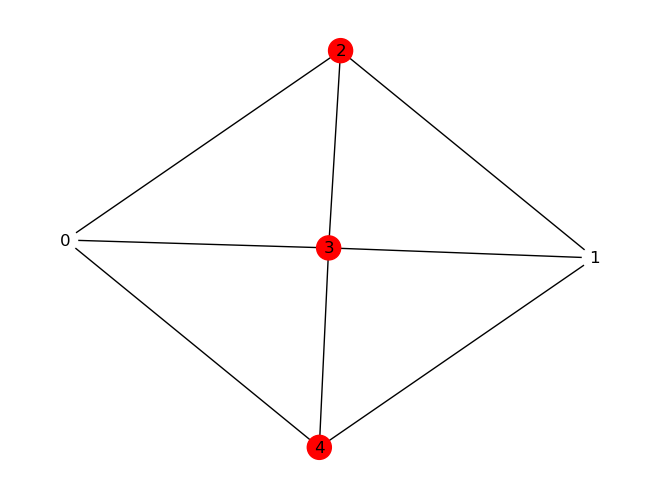

In [20]:
my_network = randomly_colored_graph(5, pair_prob=0.6, color_prob=0.4, seed=123456)
draw_colored_graph(my_network)

How do we define is_valid?

+ If the number of nodes is not 3, the solution is not valid.
+ There have to be exactly 2 edges.  Invalid check: if the number of edges is not 2, it's invalid.
+ There have to be two red nodes. And there's no connection between the two red nodes.


In [21]:
def find_two_unconnected_reds(solution, i, g):
    def is_valid(nodes):
        if len(nodes)!=3:
            return False
        
        a, b, c = nodes[0], nodes[1], nodes[2]
        edges = 0
        if (a,b) in g.edges:
            edges += 1
        if (a,c) in g.edges:
            edges += 1
        if (b,c) in g.edges:
            edges += 1
        if edges != 2:
            return False
    
        reds = 0
        if g.nodes[a]['color']=='red':
            reds += 1
        if g.nodes[b]['color']=='red':
            reds += 1
        if g.nodes[c]['color']=='red':
            reds += 1
        if reds!=2:
            return False
        
        if (a,b) not in g.edges and g.nodes[a]['color']=='red' and g.nodes[b]['color']=='red':
            return True
        if (a,c) not in g.edges and g.nodes[a]['color']=='red' and g.nodes[c]['color']=='red':
            return True
        if (c,b) not in g.edges and g.nodes[c]['color']=='red' and g.nodes[b]['color']=='red':
            return True
        
        return False
    
        
    if i==len(solution):
        nodes = [i for i in range(len(solution)) if solution[i]==True]
        if is_valid(nodes):
            print(nodes)
    else:
        for p in [True, False]:             
            solution[i] = p                
            find_two_unconnected_reds(solution, i+1, g)


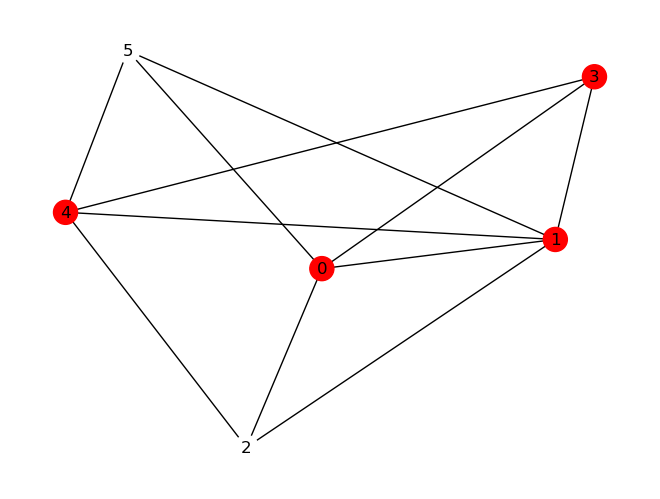

In [42]:
my_network = randomly_colored_graph(6, pair_prob=0.6, color_prob=0.4, seed=28)
draw_colored_graph(my_network)

In [43]:
find_two_unconnected_reds([None]*len(my_network), 0, my_network)

[0, 2, 4]
[0, 4, 5]
